C:\Users\deran\AppData\Local\Temp\ipykernel_35700\1154606463.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r*r-x*x) #Solution to the problem.


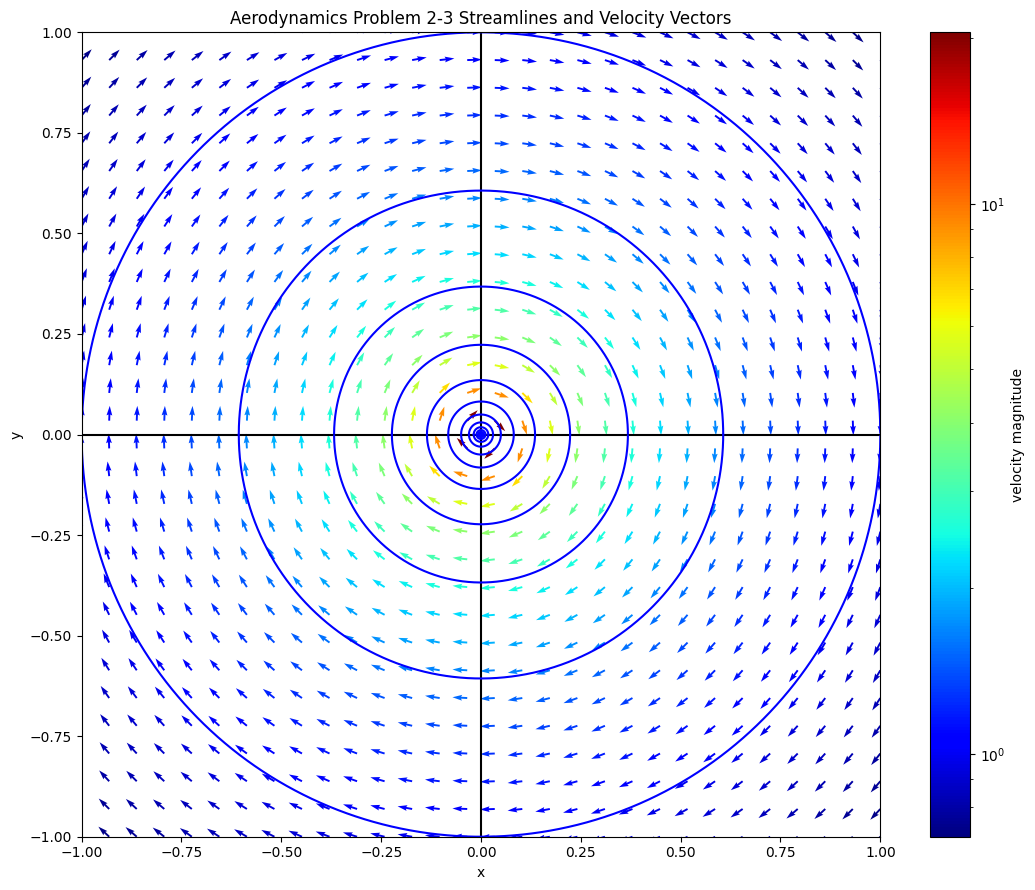

In [62]:
#standard imports for plotting mathematical plots. May need to be installed on individual machines.
import math
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors

#Prepare the plotting axes
fig, ax = plt.subplots(figsize = (11,9), layout = "tight") 

#Define the stream functions
def streamFunction(x,r):
    return np.sqrt(r*r-x*x) #Solution to the problem.
    #r is the radius. It is equal to e^{d/c} where d is an arbitrary integration constant.
    #This will in fact produce NaNs, but since matplotlib doens't plot NaNs, the visual result is precisely what we want.

#Prepare our values

c = 1 #Just set c to 1, it's an arbitrary constant, could be anything.
d = np.arange(-6,1,0.5) #Ths is the arbitrary integration constant, the one that defines all the different streamlines.
#We set it to many values of equal increment (0.5, since 1 was somewhat sparse, visually). 
x = np.arange(-1,1,0.00001) #All valid x indices that we are going to show, from -1 to 1.
#0.00001 was the resolution determined to be necessary to make the circles in the streamlines visually complete.
y = np.arange(-1,1,0.00001) #y values needed for vector field plotting.
r = np.exp(d/c) #The radius is calculated from the other values.

vGridX, vGridY = np.meshgrid(np.linspace(-1,1,30),np.linspace(-1,1,30)) #Vector field points, which are at decidedly lower resolution
#than the streamlines need to be.
u = (c*vGridY)/(vGridX*vGridX+vGridY*vGridY) #Velocity field in the x direction
v = -(c*vGridX)/(vGridX*vGridX+vGridY*vGridY) #Velocity field in the y direction
#The value c is some arbitrary constant. 

#ZEROTH: make some fake interior axes for appearance's sake.
ax.plot([-1,1],[0,0],color="black")
ax.plot([0,0],[-1,1],color="black")

#FIRST: draw stream function lines.
for value in r:
    y = streamFunction(x,value)
    ax.plot(x,y,color="b")
    ax.plot(x,-y,color="b")

#SECOND: draw vector field.
#As a bunch of arrows is visually clunky, we represent the magniutude of the vectors with COLOR. 
#This requires normalizing the vectors into unit vectors.
magnitudes = np.sqrt(u*u+v*v) #The magnitude of any given vector.
vectorField = ax.quiver(vGridX,vGridY,u/magnitudes,v/magnitudes,
                        magnitudes,norm=colors.LogNorm(vmin=magnitudes.min(), vmax=magnitudes.max()),cmap = "jet")
                        #Colors are plotted logarithmically since the center velocities are a LOT faster than the other ones.
plt.colorbar(vectorField, label = "velocity magnitude") 

ax.set(title = "Aerodynamics Problem 2-3 Streamlines and Velocity Vectors", xlabel = "x", ylabel = "y")
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

#For saving file as a PDF
plt.savefig("StreamlineVectorGraph.pdf", format='pdf', bbox_inches='tight')

#Showing the figure. If not working due to system architecture, just look at the saved file.
plt.show()